In [99]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import itertools

import os

In [2]:
dados_treinamento = pd.read_table('D:/Dados/Desktop/R/Kaggle - Digit Recognizer/train.csv', sep=',')
dados_teste = pd.read_table('D:/Dados/Desktop/R/Kaggle - Digit Recognizer/test.csv', sep=',')

In [7]:
treinamento = dados_treinamento.drop(labels = ['label'], axis = 1)
treinamento = np.array(treinamento, dtype = np.float32)
teste = np.array(dados_teste, dtype = np.float32)
labels_treinamento = dados_treinamento['label']
labels_treinamento = np.array(labels_treinamento)

In [14]:
treinamento = treinamento.reshape(-1, 28, 28, 1)

In [78]:
treinamento.shape

(42000, 28, 28, 1)

In [73]:
labels_treinamento = labels_treinamento.reshape(-1, 1)

In [81]:
labels_treinamento.shape

(42000, 1)

In [40]:
teste = teste.reshape(-1, 28, 28, 1)

In [80]:
teste.shape

(28000, 28, 28, 1)

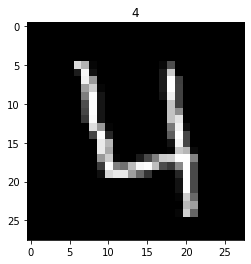

In [36]:
plt.title(str(labels_treinamento[3]))
plt.imshow(treinamento[3], cmap = 'gray')
plt.show()

In [74]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (28,28,1)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Flatten(),
    Dense(units = 10, activation = 'softmax')
])

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                31370     
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
__________________________________________________

In [76]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [77]:
model.fit(x = treinamento, y = labels_treinamento, epochs = 10, verbose = 2)

Epoch 1/10
1313/1313 - 17s - loss: 1.1797 - accuracy: 0.8582
Epoch 2/10
1313/1313 - 17s - loss: 0.1995 - accuracy: 0.9586
Epoch 3/10
1313/1313 - 17s - loss: 0.1207 - accuracy: 0.9721
Epoch 4/10
1313/1313 - 17s - loss: 0.0803 - accuracy: 0.9786
Epoch 5/10
1313/1313 - 17s - loss: 0.0602 - accuracy: 0.9837
Epoch 6/10
1313/1313 - 17s - loss: 0.0452 - accuracy: 0.9867
Epoch 7/10
1313/1313 - 17s - loss: 0.0335 - accuracy: 0.9897
Epoch 8/10
1313/1313 - 16s - loss: 0.0270 - accuracy: 0.9913
Epoch 9/10
1313/1313 - 17s - loss: 0.0193 - accuracy: 0.9935
Epoch 10/10
1313/1313 - 17s - loss: 0.0153 - accuracy: 0.9947


In [82]:
predicoes = model.predict(x = teste, verbose = 0)

In [104]:
# Probabilidade de ser cada número
predicoes[2]

array([2.6870440e-22, 1.6987967e-12, 4.6152531e-09, 2.0109131e-12,
       3.8844782e-08, 5.2372928e-13, 1.3816959e-21, 1.3292759e-10,
       3.7407193e-09, 1.0000000e+00], dtype=float32)

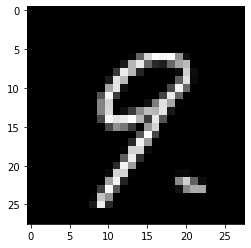

In [105]:
plt.imshow(teste[2], cmap = 'gray')

In [88]:
predicoes_arredondadas = np.argmax(predicoes, axis = -1)

In [90]:
predicoes_arredondadas[0:10]

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3], dtype=int64)

In [95]:
submissao = pd.DataFrame(predicoes_arredondadas, columns = ['Label'])

In [96]:
submissao.to_csv('D:/Dados/Desktop/R/Kaggle - Digit Recognizer/submissao_keras.csv', index = False)

In [112]:
numeros, contador = np.unique(predicoes_arredondadas, return_counts=True)
dict(zip(numeros, contador))

{0: 2785,
 1: 3176,
 2: 2706,
 3: 2862,
 4: 2826,
 5: 2529,
 6: 2714,
 7: 2895,
 8: 2647,
 9: 2860}

In [ ]:
## Salvando o modelo

In [98]:
if os.path.isfile('D:/Dados/Desktop/R/Kaggle - Digit Recognizer/modelo_digitos_keras.h5') is False:
    model.save('D:/Dados/Desktop/R/Kaggle - Digit Recognizer/modelo_digitos_keras.h5')

In [100]:
novo_modelo = load_model('D:/Dados/Desktop/R/Kaggle - Digit Recognizer/modelo_digitos_keras.h5')

In [103]:
novo_modelo.predict(x = teste, verbose = 0)

array([[2.0610892e-18, 7.3501051e-19, 1.0000000e+00, ..., 3.1493840e-12,
        4.7918748e-14, 4.3365794e-13],
       [1.0000000e+00, 4.2215809e-20, 4.0834277e-11, ..., 2.2172635e-12,
        1.2113730e-13, 1.1223763e-11],
       [2.6870440e-22, 1.6987967e-12, 4.6152531e-09, ..., 1.3292759e-10,
        3.7407193e-09, 1.0000000e+00],
       ...,
       [7.6483013e-25, 5.6835053e-22, 2.7419232e-22, ..., 1.8288541e-18,
        1.2658840e-16, 1.6038568e-13],
       [4.5244599e-15, 2.1658717e-15, 2.7611689e-17, ..., 6.4293597e-09,
        8.6030391e-13, 9.9998820e-01],
       [1.3808325e-20, 1.8046527e-19, 1.0000000e+00, ..., 1.0991491e-14,
        6.3414619e-14, 1.0413191e-13]], dtype=float32)